In [1]:
import pandas as pd
import json
import numpy as np

df = pd.read_csv('../../data/clean_data/merged_data.csv')

In [2]:
import matplotlib.pyplot as plt

variables = [
    "Annual CO₂ emissions",
    "Primary energy consumption (TWh)",
    "GDP",
    "Population"
]

global_trends = df.groupby("Year")[variables].sum()

for variable in variables:
    plt.figure(figsize=(10, 6))
    plt.plot(global_trends.index, global_trends[variable], marker='o', linestyle='-', label=variable)
    plt.title(f"Global Trend of {variable} Over Time", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(variable, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"../../img/Global_Trend_{variable.replace(' ', '_').lower()}.png")
    plt.close() 


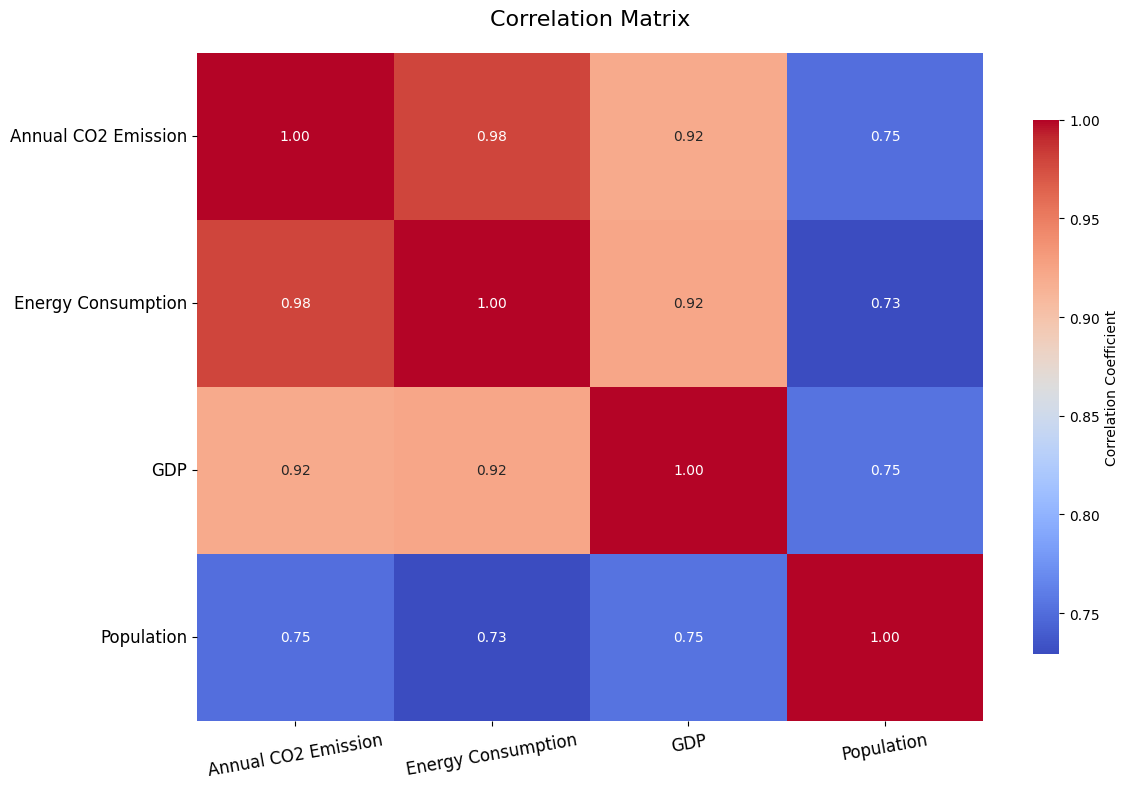

In [3]:
import seaborn as sns

log_columns = [
    "Log Annual CO₂ emissions",
    "Log Primary energy consumption (TWh)",
    "Log GDP",
    "Log Population"
]

# Compute correlation matrix for log-transformed values
log_corr = df[log_columns].corr()


# Updated column labels
renamed_columns = {
    "Log Annual CO₂ emissions": "Annual CO2 Emission",
    "Log Primary energy consumption (TWh)": "Energy Consumption",
    "Log GDP": "GDP",
    "Log Population": "Population"
}

# Rename the columns 
log_corr_renamed = log_corr.rename(columns=renamed_columns, index=renamed_columns)

plt.figure(figsize=(12, 8))
sns.heatmap(
    log_corr_renamed,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"fontsize": 10},
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)
plt.title("Correlation Matrix", fontsize=16, pad=20)
plt.xticks(fontsize=12, rotation=10)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.savefig(f"../../img/heatmap.png")
plt.show()

